# Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/kaggle/input/quora-question-pairs/train.csv")

In [3]:
dataset.shape

(404290, 6)

In [4]:
dataset.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
dataset.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
152833,152833,240035,240036,Is the skanda avatar is before or after krishn...,What will be the result of the WC '14 if Neyma...,0
96295,96295,160422,160423,Should I buy an iPad pro 9.7″ if I have had iP...,Most of the us universities do not have any ru...,0
215855,215855,94560,95103,Is there a way to see who viewed my Instagram ...,Is there app to see who viewed your pictures o...,1
33351,33351,61285,61286,Can I get married?,Can you get married on Quora?,0
81882,81882,111161,138956,What does polarity of molecules mean?,What does a polar molecule contain?,0
160037,160037,11752,1317,What are some mind blowing smartphones gadgets?,What are the best available smartphones gadgets?,1
320054,320054,445554,445555,Tech Mahindra: I am a mechanical engineer and ...,I have done my BE in mechanical engineering. S...,0
125082,125082,49253,201859,Is there a way to check exactly what time USPS...,Is it possible to find out what time the post ...,0
84381,84381,142674,142675,What are some foods that start with the letter c?,What are foods that start with the letter X?,0
119031,119031,193349,100641,What happened at festivals during the Renaissa...,What are some of the best Renaissance festivals?,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
# check for missing values in the dataset
dataset.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [10]:
# distribution of duplicate and non-duplicate questions
dataset["is_duplicate"].value_counts()

is_duplicate
0    255027
1    149263
Name: count, dtype: int64

<Axes: xlabel='is_duplicate'>

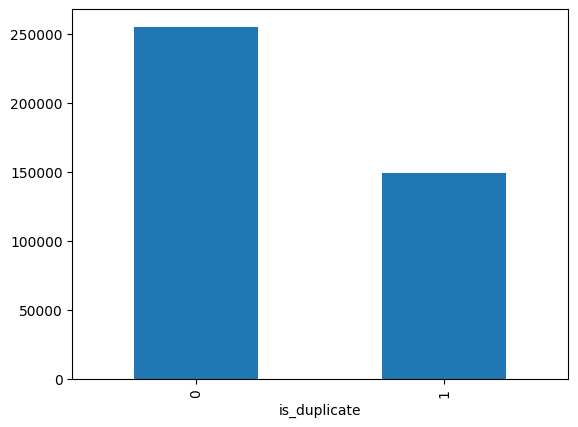

In [11]:
dataset["is_duplicate"].value_counts().plot(kind = "bar")


In [12]:
# Repeated questions
qid = pd.Series(dataset['qid1'].tolist()+ dataset['qid2'].tolist())
print("Number of unique questions" , np.unique(qid).shape[0])
x = qid.value_counts()>1
print("Number of questions getting reqpeated",x[x].shape[0])

Number of unique questions 537933
Number of questions getting reqpeated 111780


In [13]:
new_df = dataset.sample(50000)

In [14]:

new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [15]:
# remove NAN values
new_df.dropna(inplace = True)

In [16]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [17]:
new_df.duplicated().sum()

0

# Feature Engineering

In [18]:
# Calculate length (number of characters) of each question and store as new features
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [19]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
393950,393950,526795,136410,How can I immigrate to Norway as a driver?,How can I immigrate to Norway?,0,42,30
173933,173933,191278,268200,Can you brush your teeth if you have to fast s...,How can brushing your teeth with ash make them...,0,102,54
20432,20432,38542,5791,Can we control our feelings?,How do I control my emotion and sadness?,1,28,40
211363,211363,316182,316183,Two cards are drawn without replacement from a...,"Consider a jar with 3 red balls, 7 purple ball...",0,149,198
293533,293533,415312,46757,What document should I bring to a US B1/B2 vis...,"The US visa in my passport says ""Visa - R"" and...",0,58,121


In [20]:
# Calculate number of words of each question and store as new features
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [21]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
393950,393950,526795,136410,How can I immigrate to Norway as a driver?,How can I immigrate to Norway?,0,42,30,9,6
173933,173933,191278,268200,Can you brush your teeth if you have to fast s...,How can brushing your teeth with ash make them...,0,102,54,18,10
20432,20432,38542,5791,Can we control our feelings?,How do I control my emotion and sadness?,1,28,40,5,8
211363,211363,316182,316183,Two cards are drawn without replacement from a...,"Consider a jar with 3 red balls, 7 purple ball...",0,149,198,30,38
293533,293533,415312,46757,What document should I bring to a US B1/B2 vis...,"The US visa in my passport says ""Visa - R"" and...",0,58,121,11,26


In [22]:
# Function to count the number of common words between question1 and question2
def common_words(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
        return len(w1 & w2)

In [23]:
new_df['word_common'] = new_df.apply(common_words,axis = 1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
393950,393950,526795,136410,How can I immigrate to Norway as a driver?,How can I immigrate to Norway?,0,42,30,9,6,5
173933,173933,191278,268200,Can you brush your teeth if you have to fast s...,How can brushing your teeth with ash make them...,0,102,54,18,10,3
20432,20432,38542,5791,Can we control our feelings?,How do I control my emotion and sadness?,1,28,40,5,8,1
211363,211363,316182,316183,Two cards are drawn without replacement from a...,"Consider a jar with 3 red balls, 7 purple ball...",0,149,198,30,38,11
293533,293533,415312,46757,What document should I bring to a US B1/B2 vis...,"The US visa in my passport says ""Visa - R"" and...",0,58,121,11,26,4


In [24]:
# Function to count the total words in question1 and question2
def total_words(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
        return len(w1) + len(w2)

In [25]:
new_df['word_total'] = new_df.apply(total_words,axis = 1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
393950,393950,526795,136410,How can I immigrate to Norway as a driver?,How can I immigrate to Norway?,0,42,30,9,6,5,15
173933,173933,191278,268200,Can you brush your teeth if you have to fast s...,How can brushing your teeth with ash make them...,0,102,54,18,10,3,27
20432,20432,38542,5791,Can we control our feelings?,How do I control my emotion and sadness?,1,28,40,5,8,1,13
211363,211363,316182,316183,Two cards are drawn without replacement from a...,"Consider a jar with 3 red balls, 7 purple ball...",0,149,198,30,38,11,58
293533,293533,415312,46757,What document should I bring to a US B1/B2 vis...,"The US visa in my passport says ""Visa - R"" and...",0,58,121,11,26,4,33


In [26]:
# Create a new feature 'word_share' = ratio of common words to total unique words (rounded to 2 decimals)
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
393950,393950,526795,136410,How can I immigrate to Norway as a driver?,How can I immigrate to Norway?,0,42,30,9,6,5,15,0.33
173933,173933,191278,268200,Can you brush your teeth if you have to fast s...,How can brushing your teeth with ash make them...,0,102,54,18,10,3,27,0.11
20432,20432,38542,5791,Can we control our feelings?,How do I control my emotion and sadness?,1,28,40,5,8,1,13,0.08
211363,211363,316182,316183,Two cards are drawn without replacement from a...,"Consider a jar with 3 red balls, 7 purple ball...",0,149,198,30,38,11,58,0.19
293533,293533,415312,46757,What document should I bring to a US B1/B2 vis...,"The US visa in my passport says ""Visa - R"" and...",0,58,121,11,26,4,33,0.12


In [27]:
new_df.shape

(50000, 13)

# EDA

/tmp/ipykernel_36/3801966243.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['q1_len'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum characters 1
maximum characters 339
average num of characters 59


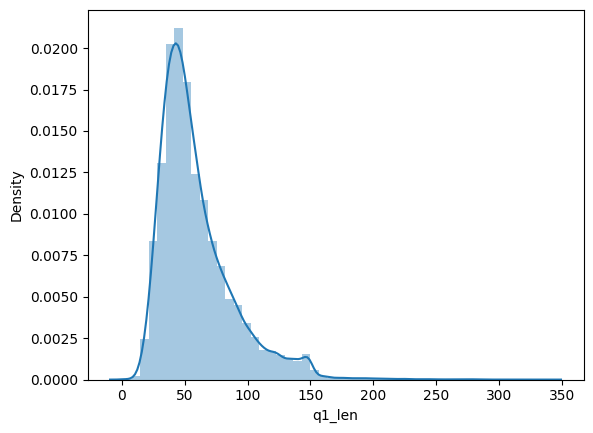

In [28]:
# Analysis of features
sns.distplot(new_df['q1_len'])
print("minimum characters",new_df['q1_len'].min())
print("maximum characters",new_df['q1_len'].max())
print("average num of characters",int(new_df['q1_len'].mean()))


/tmp/ipykernel_36/2609564966.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label = 'non_duplicate')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_36/2609564966.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or 

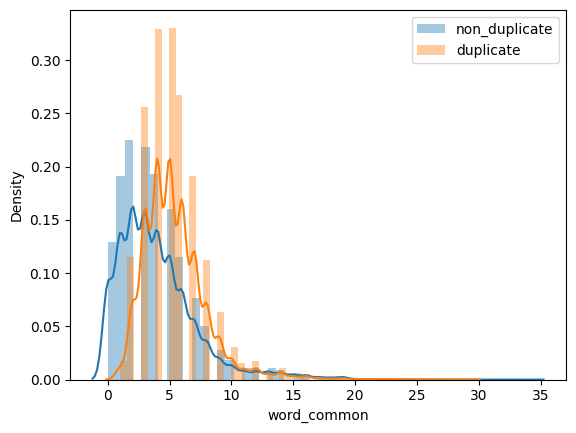

In [29]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label = 'non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label = 'duplicate')
plt.legend()
plt.show()

In [30]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
393950,How can I immigrate to Norway as a driver?,How can I immigrate to Norway?
173933,Can you brush your teeth if you have to fast s...,How can brushing your teeth with ash make them...
20432,Can we control our feelings?,How do I control my emotion and sadness?
211363,Two cards are drawn without replacement from a...,"Consider a jar with 3 red balls, 7 purple ball..."
293533,What document should I bring to a US B1/B2 vis...,"The US visa in my passport says ""Visa - R"" and..."


In [31]:
final_df = new_df.drop(columns = ['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
393950,0,42,30,9,6,5,15,0.33
173933,0,102,54,18,10,3,27,0.11
20432,1,28,40,5,8,1,13,0.08
211363,0,149,198,30,38,11,58,0.19
293533,0,58,121,11,26,4,33,0.12


# Using BOW

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features = 3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [33]:
temp_df1 = pd.DataFrame(q1_arr,index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index = ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis = 1)
temp_df.shape

(50000, 6000)

In [34]:
final_df = pd.concat([final_df, temp_df],axis = 1)
print(final_df.shape)
final_df.head()

(50000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
393950,0,42,30,9,6,5,15,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0
173933,0,102,54,18,10,3,27,0.11,0,0,...,0,0,0,0,1,0,0,0,0,0
20432,1,28,40,5,8,1,13,0.08,0,0,...,0,0,0,0,0,0,0,0,0,0
211363,0,149,198,30,38,11,58,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0
293533,0,58,121,11,26,4,33,0.12,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size = 0.1,random_state = 42)

# Modelling

## Random Forest

In [36]:
# Import RandomForest and accuracy evaluation metric
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize RandomForest with balanced class weights to handle class imbalance
rf = RandomForestClassifier(class_weight="balanced")

# Train the model on training data
rf.fit(X_train,y_train)

# Predict labels on test data
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)*100

0.7868

## XGBoost

In [37]:
# Import the XGBoost classifier
from xgboost import XGBClassifier  

# Initialize the XGBoost model with default parameters
xgb = XGBClassifier()  

# Train (fit) the model on training data (X_train, y_train)
xgb.fit(X_train, y_train)  

# Predict the labels for the test data
y_pred = xgb.predict(X_test)  

# Calculate and return the accuracy score of the model
accuracy_score(y_test, y_pred)  


77.60000000000001

In [38]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Prediction
y_pred = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision
precision = precision_score(y_test, y_pred)*100
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)*100
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)*100
print("F1 Score:", f1)

# Full Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[2773  361]
 [ 705 1161]]
Precision: 76.28120893561103
Recall: 62.21864951768489
F1 Score: 68.53600944510035

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84      3134
           1       0.76      0.62      0.69      1866

    accuracy                           0.79      5000
   macro avg       0.78      0.75      0.76      5000
weighted avg       0.78      0.79      0.78      5000



In [39]:

# Prediction
y_pred = xgb.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision
precision = precision_score(y_test, y_pred)*100
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)*100
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)*100
print("F1 Score:", f1)

# Full Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[2551  583]
 [ 537 1329]]
Precision: 69.50836820083683
Recall: 71.22186495176848
F1 Score: 70.35468501852833

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      3134
           1       0.70      0.71      0.70      1866

    accuracy                           0.78      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.78      0.78      0.78      5000



## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test , y_pred)*100

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


78.68